In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/SentimentAnalysis/rnn/data/28500HSA-test.csv')

data['CleanText'] = data['CleanText'].astype(str)    # Convert datatype to integer
data.head(20)

,CleanText,Sentiment
0,in a telephone interview he acknowledged that ...,0
1,further the regime s russian and iranian allie...,0
2,attacks have also been carried out on pipelines,0
3,howard schmidt doesn t like the term cyber war,0
4,bed class work gym or then class another day t...,0
5,the taliban were initially trying to win publi...,0
6,wonders why someone that u like so much can ma...,0
7,if you are being harassed by calls about your ...,0
8,abrams denied this he told the committee that ...,0
9,i am on attempt and hour of calling and being ...,0


### Load RNN Model & Tokanizer

In [3]:
import pickle
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences
import re
from nltk.tokenize import word_tokenize

with open('/content/gdrive/My Drive/SentimentAnalysis/rnn/tokenizers/tokenizer-rnn-cnn-w2v-feb-27.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)
# load rnn model
rnn_model = load_model('/content/gdrive/My Drive/SentimentAnalysis/rnn/models/rnn-cnn-w2v-model-feb-27-04-0.9570.hdf5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
test_sequences = tokenizer.texts_to_sequences(data.CleanText)
padded_test_sequences = pad_sequences(test_sequences, maxlen=35)
y_pred = rnn_model.predict(padded_test_sequences, verbose=1, batch_size=2048)
y_pred = pd.DataFrame(y_pred, columns=['Prediction'])
data['Prediction'] = y_pred['Prediction'].map(lambda p: 1 if p >= 0.5 else 0)
data = data.dropna()
data['Prediction'] = data['Prediction'].astype(int)
print(accuracy_score(data['Sentiment'], data['Prediction']*100))

1954/1954 [==============================] - 1s 720us/step
0.7727737973387923


#### Accuracy
We got a **77.28%** accuracy which improved from around 75.32% accuracy from last time!

## Analysis
### WordCloud

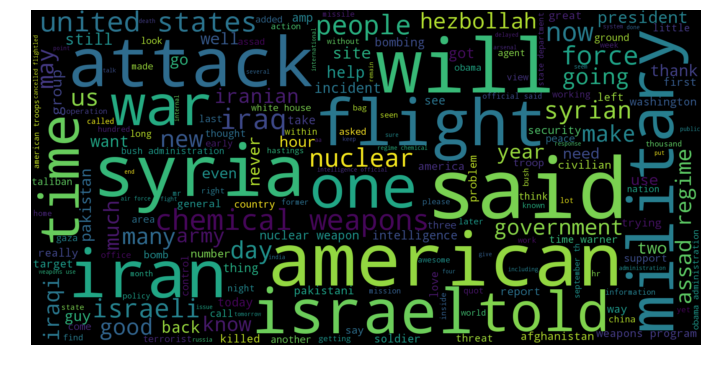

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tweets in a single text
wordcloud_texts = ' '.join(data['CleanText'].tolist()).lower()

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(wordcloud_texts)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Piechart

In [0]:
def plot_pie_chart(positive_count, negative_count, title):
  # Data to plot
  labels = 'Positive', 'Negative'
  sizes = [positive_count, negative_count]
  colors = ['yellowgreen', 'lightcoral']
  explode = (0.1, 0)  # explode 1st slice

  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=140)
  plt.title(title)
  plt.axis('equal')
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.show()

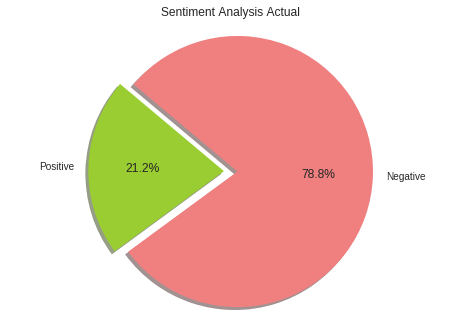

In [7]:
plot_pie_chart(data['Sentiment'].value_counts()[1], data['Sentiment'].value_counts()[0], 
               'Sentiment Analysis Actual')

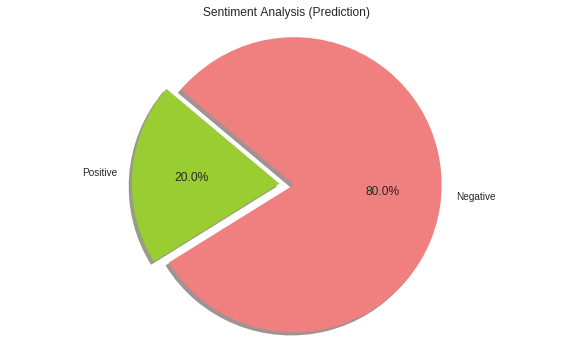

In [8]:
plot_pie_chart(data['Prediction'].value_counts()[1], data['Prediction'].value_counts()[0],
              'Sentiment Analysis (Prediction)')

In [9]:
data

,CleanText,Sentiment,Prediction
0,in a telephone interview he acknowledged that ...,0,0
1,further the regime s russian and iranian allie...,0,0
2,attacks have also been carried out on pipelines,0,0
3,howard schmidt doesn t like the term cyber war,0,0
4,bed class work gym or then class another day t...,0,0
5,the taliban were initially trying to win publi...,0,0
6,wonders why someone that u like so much can ma...,0,0
7,if you are being harassed by calls about your ...,0,0
8,abrams denied this he told the committee that ...,0,0
9,i am on attempt and hour of calling and being ...,0,0
